In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [2]:
df=pd.read_csv("Downloads/BTC-USD.csv")

<AxesSubplot:>

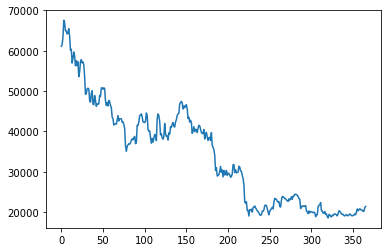

In [3]:
df.head(10)
df['Adj Close'].plot()

In [19]:
x=df[['Open','High','Low','Close']].values

y=df['Adj Close'].values
 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.26,  random_state=0)
print(x)
type(x)


[[61460.078125 62541.46875  60844.609375 61125.675781]
 [61068.875    61590.683594 60163.78125  61527.480469]
 [61554.921875 63326.988281 61432.488281 63326.988281]
 ...
 [20162.689453 20382.095703 20086.240234 20209.988281]
 [20208.769531 21209.560547 20188.019531 21147.230469]
 [21165.160156 21445.326172 21106.419922 21377.064453]]


numpy.ndarray

In [20]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
#print(y_pred)

In [21]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)


In [22]:
model = RandomForestRegressor(n_estimators=500, random_state=42, min_samples_split=2, min_samples_leaf=1, max_depth=10, bootstrap=True)
model.fit(x_train, y_train)
predict = model.predict(x_test)
print(predict)
print(predict.shape)

[40069.69869166 22845.55185753 46728.53482826 57184.98521863
 35725.17198445 19338.44593108 37070.97379745 22490.59771101
 19243.54085144 64919.92071116 39395.56195064 44473.1468478
 21210.09226173 23211.22693552 20100.8833374  29799.95729708
 20266.73573591 42573.59424983 22523.21270719 44272.20097675
 46297.5130704  29115.61235568 46524.66686066 21586.08899222
 19790.4282971  20778.84827362 43928.80108753 19571.00534149
 39168.67184389 30891.60778127 41798.12583607 44216.00020719
 58955.41206267 50412.06917192 46504.94458335 65658.91312515
 45922.42901582 41016.27707057 22652.16049232 41760.52570319
 31023.98927735 19919.31387434 29935.44770731 22601.45023451
 57204.69403895 18845.43963211 30910.79801173 30944.52407425
 19304.83136021 41929.18641416 39229.19497655 24723.7585314
 20295.2990446  40470.94362522 41484.88787103 47027.18442323
 50629.82788307 41428.66561727 36989.55735947 40630.41752349
 19122.2434081  22993.64755285 64352.32768767 42211.25484971
 19428.52295398 19181.4188

In [23]:
from sklearn.model_selection import RandomizedSearchCV
grid_rf = {
'n_estimators': [20, 50, 100, 500, 1000],  
'max_depth': np.arange(1, 15, 1),  
'min_samples_split': [2, 10, 9], 
'min_samples_leaf': np.arange(1, 15, 2, dtype=int),  
'bootstrap': [True, False], 
'random_state': [1, 2, 30, 42]
}
rscv = RandomizedSearchCV(estimator=model, param_distributions=grid_rf, cv=3, n_jobs=-1, verbose=2, n_iter=200)
rscv_fit = rscv.fit(x_train, y_train)
best_parameters = rscv_fit.best_params_
print(best_parameters)

Fitting 3 folds for each of 200 candidates, totalling 600 fits
{'random_state': 2, 'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 9, 'bootstrap': False}


In [26]:
model = RandomForestRegressor(n_estimators=100, random_state=2, min_samples_split=2, min_samples_leaf=1, max_depth=9, bootstrap=False)
model.fit(x_train, y_train)
predict = model.predict(x_test)
print(predict)
print(predict.shape)

[40102.16976594 22765.29812514 46764.42447933 57071.06960924
 35567.8432813  19327.854004   37106.7578125  22513.65078125
 19214.99619134 65237.457969   39397.51605468 44342.91523444
 21231.65625    23212.81065433 20099.94043    29847.01589882
 20241.089844   42469.28295605 22559.9896682  44346.40000012
 46764.42447933 29083.804688   46453.566406   21603.552246
 19812.371094   20723.038086   43948.97005233 19581.725586
 39172.84757826 31199.86923831 41796.23261731 44351.15195332
 60310.117344   50533.24859375 46453.566406   66261.17539074
 45724.98898474 41143.929688   22715.24710961 41795.35863291
 31376.83222662 19880.06457043 29842.81535198 22565.36552754
 57071.06960924 18793.73007836 31199.86923831 31438.38457038
 19278.36653667 41781.55371104 39214.21875    23746.5010159
 20293.51237    40553.464844   41444.7767577  47128.003906
 50598.12679714 41492.18308605 36877.591797   40538.9207032
 19149.13869131 22931.43871116 65018.049219   42195.58800799
 19415.05957    19146.9015624  4

In [27]:
from sklearn import metrics
print("Mean Absolute Error:", round(metrics.mean_absolute_error(y_test, predict), 4))
print("Mean Squared Error:", round(metrics.mean_squared_error(y_test, predict), 4))
print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(y_test, predict)), 4))
print("(R^2) Score:", round(metrics.r2_score(y_test, predict), 4))
print(f'Train Score : {model.score(x_train, y_train) * 100:.2f}% and Test Score : {model.score(x_test, y_test) * 100:.2f}% using Random Tree Regressor.')
errors = abs(predict - y_test)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.') 

Mean Absolute Error: 162.329
Mean Squared Error: 108998.9667
Root Mean Squared Error: 330.1499
(R^2) Score: 0.9993
Train Score : 100.00% and Test Score : 99.93% using Random Tree Regressor.
Accuracy: 99.53 %.


In [28]:
predictions = pd.DataFrame({"Predictions": predict}, index=pd.date_range(start=df.index[-1], periods=len(predict), freq="D"))
predictions.to_csv("Predicted-price-data.csv")
#colllects future days from predicted values
oneyear_df = pd.DataFrame(predictions[:252])
oneyear_df.to_csv("one-year-predictions.csv")
onemonth_df = pd.DataFrame(predictions[:21])
onemonth_df.to_csv("one-month-predictions.csv")
fivedays_df = pd.DataFrame(predictions[:5])
fivedays_df.to_csv("five-days-predictions.csv")

In [29]:
oneyear_df_pred = pd.read_csv("one-year-predictions.csv")
oneyear_df_pred.set_index("Date", inplace=True)
buy_price = min(oneyear_df_pred["Predictions"])
sell_price = max(oneyear_df_pred["Predictions"])
oneyear_buy = oneyear_df_pred.loc[oneyear_df_pred["Predictions"] == buy_price]
oneyear_sell = oneyear_df_pred.loc[oneyear_df_pred["Predictions"] == sell_price]
print("Buy price and date")
print(oneyear_buy)
print("Sell price and date")
print(oneyear_sell)
oneyear_df_pred["Predictions"].plot(figsize=(10, 5), title="Forecast for the next 1 year", color="blue")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

KeyError: "None of ['Date'] are in the columns"

In [ ]:
oneyear_df_pred = pd.read_csv("one-month-predictions.csv")
oneyear_df_pred.set_index("Date", inplace=True)
buy_price = min(oneyear_df_pred["Predictions"])
sell_price = max(oneyear_df_pred["Predictions"])
oneyear_buy = oneyear_df_pred.loc[oneyear_df_pred["Predictions"] == buy_price]
oneyear_sell = oneyear_df_pred.loc[oneyear_df_pred["Predictions"] == sell_price]
print("Buy price and date")
print(oneyear_buy)
print("Sell price and date")
print(oneyear_sell)
oneyear_df_pred["Predictions"].plot(figsize=(10, 5), title="Forecast for the next 1 year", color="blue")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

In [ ]:
fivedays_df_pred = pd.read_csv("five-days-predictions.csv")
fivedays_df_pred.set_index("Date", inplace=True)
buy_price = min(fivedays_df_pred["Predictions"])
sell_price = max(fivedays_df_pred["Predictions"])
fivedays_buy = fivedays_df_pred.loc[fivedays_df_pred["Predictions"] == buy_price]
fivedays_sell = fivedays_df_pred.loc[fivedays_df_pred["Predictions"] == sell_price]
print("Buy price and date")
print(fivedays_buy)
print("Sell price and date")
print(fivedays_sell)
fivedays_df_pred["Predictions"].plot(figsize=(10, 5), title="Forecast for the next 5 days", color="blue")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()